# Section 4 - Computer vision based machine learning #
## Building CNNs with pyTorch ##

## Dr. Antonin Vacheret (avachere@imperial.ac.uk) 
## High Energy Physics Group
## 523 Blackett Lab

In this second part we will:

Star with: 
* look at the MNIST dataset
* construct datasets, loaders and visualise the data
* Build a MLP to classify the MNIST dataset

and then:
* Build a CNN based on the MNIST dataset features

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from time import time
import copy
import pandas as pd 

We are going to use here the datasets readily available in pytorch using ```torchvision.datasets```. We will need to define if the training set is used to train or test. We will add some transformations that are already available (ToTensor() and Normalise).

In [2]:
train = torchvision.datasets.MNIST(root='./data', download=True, train=True, transform=transforms.Compose([transforms.ToTensor()]))
#train = torchvision.datasets.MNIST(root='./data', download=True, train=True, transform=transforms.Compose([transforms.ToTensor(),
 

Now we have a training sample based on MNIST we can instantiate a dataloader that will be used to provide training data to our model:

In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=10) #we can set the batch size for each interation

It is now possible to visualise easily our dataset using the dataloader and explore:

image shape: torch.Size([10, 1, 28, 28]) 
 label shape: torch.Size([10])


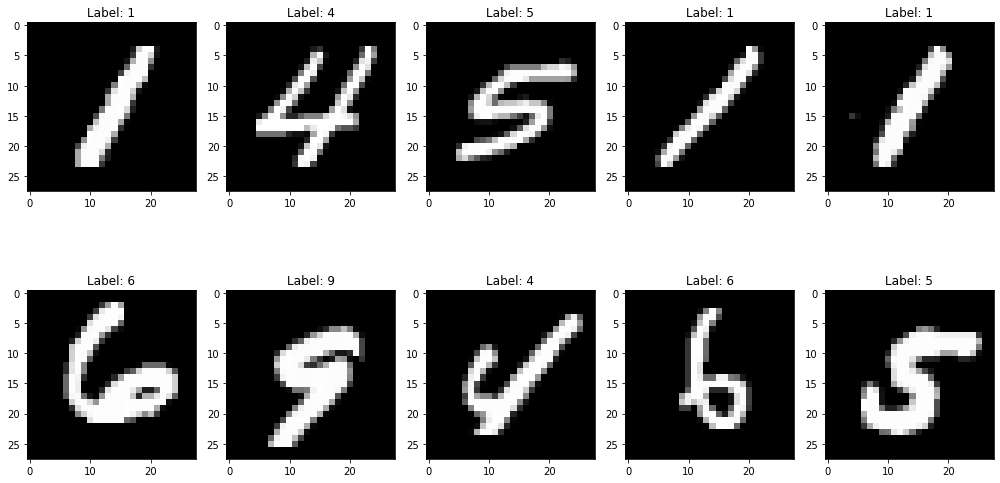

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(14, 8))
ax = ax.flatten()
dataiter = iter(train_loader)
images, labels = dataiter.next()
print("image shape:", images.shape, "\n label shape:", labels.shape)
for i in range(0, 10):
    plottable_image = images[i].squeeze()
    ax[i].imshow(plottable_image, cmap='gray')
    ax[i].set_title("Label: {}".format(labels[i]))
fig.tight_layout()

Exercise: 
* write a Load_MNIST function that load the MNIST dataset both for training and testing and return four sets ```train,test,train_loader, test_loader```.
* write a short function ```visualize_MNIST``` to visualise any number of digits using the dataloader

In [5]:
def load_MNIST():
  """Function to load and normalize MNIST data""" 
  train = torchvision.datasets.MNIST(root='./data', download=True, train=True, transform=transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ]))
  test = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ]))
  print("MNIST dataset loaded and normalized.")
  train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=100)
  test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=False, batch_size=100)
  print("PyTorch DataLoaders loaded.")
  return train, test, train_loader, test_loader

In [6]:
def visualize_MNIST(train_loader):
  """Function to visualize data given a DataLoader object"""
  dataiter = iter(train_loader)
  images, labels = dataiter.next()
  print("image shape:", images.shape, "\n label shape:", labels.shape)
  # visualize data
  fig, ax = plt.subplots(2,5)
  for i, ax in enumerate(ax.flatten()):
      im_idx = np.argwhere(labels == i)[0][0]
      plottable_image = images[im_idx].squeeze()
      ax.imshow(plottable_image)

MNIST dataset loaded and normalized.
PyTorch DataLoaders loaded.
image shape: torch.Size([100, 1, 28, 28]) 
 label shape: torch.Size([100])


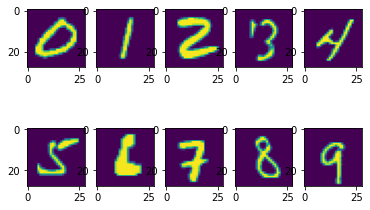

In [7]:
# Load and visualize MNISt
train, test, train_loader, test_loader = load_MNIST()
visualize_MNIST(train_loader)

### Let's now build a MLP based on a few layers

In [8]:
class Net(nn.Module):
    
  def __init__(self):
    super(Net,self).__init__()
    self.input_layer = nn.Linear(784, 1000, bias=False)
    self.hidden1_layer = nn.Linear(1000, 1000, bias=False)
    self.hidden2_layer = nn.Linear(1000, 500, bias=False)
    self.hidden3_layer = nn.Linear(500, 200, bias=False)
    self.hidden4_layer = nn.Linear(200, 10, bias=False)

  def forward(self, x):
    x = self.input_layer(x)
    x = F.relu(x)
    x = self.hidden1_layer(x)
    x = F.relu(x)
    x = self.hidden2_layer(x)
    x = F.relu(x)
    x = self.hidden3_layer(x)
    x = F.relu(x)
    x = self.hidden4_layer(x)
    output = F.log_softmax(x, dim=1)

    return output

We need now to define a training function that will take care of the training sequence

In [9]:
def train(model, train_loader, epochs=3, learning_rate=0.001):
  """Function to train a neural net"""

  lossFunction = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  time0 = time()
  total_samples = 0 

  for e in range(epochs):
    print("Starting epoch", e)
    total_loss = 0

    for idx, (images,labels) in enumerate(train_loader):
      images = images.view(images.shape[0],-1) # flatten
      optimizer.zero_grad() # forward pass
      output = model(images)
      loss = lossFunction(output,labels) # calculate loss
      loss.backward() # backpropagate
      optimizer.step() # update weights

      total_samples += labels.size(0)
      total_loss += loss.item()

      if idx % 100 == 0:
        print("Running loss:", total_loss/ len(train_loader))

  final_time = (time()-time0)/60 
  print("Model trained in ", final_time, "minutes on ", total_samples, "samples")


In [10]:
model = Net()
train(model, train_loader, 3) # 10 epochs

Starting epoch 0
Running loss: 0.0038371729850769044
Running loss: 0.13461006959279379
Running loss: 0.1893660749991735
Running loss: 0.23308146194865306
Running loss: 0.27191264495253564
Running loss: 0.3040011991932988
Starting epoch 1
Running loss: 0.00020161335666974385
Running loss: 0.02832210009917617
Running loss: 0.05522699937224388
Running loss: 0.07944051230015854
Running loss: 0.10387970487587155
Running loss: 0.12801242412999272
Starting epoch 2
Running loss: 0.00015807386487722396
Running loss: 0.021087359168256322
Running loss: 0.03851979887733857
Running loss: 0.057317236966143055
Running loss: 0.07428974720804642
Running loss: 0.09235842476133257
Model trained in  9.830770842234294 minutes on  180000 samples


In [11]:
print(model)
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

Net(
  (input_layer): Linear(in_features=784, out_features=1000, bias=False)
  (hidden1_layer): Linear(in_features=1000, out_features=1000, bias=False)
  (hidden2_layer): Linear(in_features=1000, out_features=500, bias=False)
  (hidden3_layer): Linear(in_features=500, out_features=200, bias=False)
  (hidden4_layer): Linear(in_features=200, out_features=10, bias=False)
)


(2386000, [784000, 1000000, 500000, 100000, 2000])

2.3M parameters !!! 

In [12]:
def test(model, test_loader):
  """Test neural net"""

  correct = 0
  total = 0 

  with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
      images = images.view(images.shape[0],-1) # flatten
      output = model(images)
      values, indices = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (labels == indices).sum().item()

    acc = correct / total * 100
    # print("Accuracy: ", acc, "% for ", total, "training samples")

  return acc


In [13]:
acc = test(model, test_loader)
print("The accuracy of our vanilla NN is", acc, "%")

The accuracy of our vanilla NN is 97.21 %


### Building a CNN classifier to compare

In [14]:
batch_size = 128
device = torch.device('cpu')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x



In [15]:
train, test, train_loader, test_loader = load_MNIST()

MNIST dataset loaded and normalized.
PyTorch DataLoaders loaded.


In [16]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output.log(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output.log(), target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

You can load the trained model by `model.load_state_dict()`

In [17]:
model = Net().to(device)
#model.load_state_dict(torch.load('./data/mnist_cnns.pth'))
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [18]:
print(model)
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

Net(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


(21840, [250, 10, 5000, 20, 16000, 50, 500, 10])

In [19]:
num_epochs = 5

for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

torch.save(model.state_dict(), './data/mnist_cnns.pth')

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309706
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.089183
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.974835
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.617621
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.619580
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.301229

Test set: Average loss: 0.0034, Accuracy: 9457/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.286280
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.405222
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.326790
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.258348
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.248726
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.404388

Test set: Average loss: 0.0018, Accuracy: 9611/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.373984
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.375133
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.325996
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.246537
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.190054
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

## Feature maps ##

In [20]:
weights = []
conv_layers = []
#maxpooling_layers = []
model_children=list(model.children())
for children in model_children:
    if (type(children) == nn.Conv2d) or (type(children) == nn.MaxPool2d) :
        #print(children)
        #weights.append(children.weight)
        conv_layers.append(children)
    elif type(children) == nn.Sequential:
        print(type(children))
        for grandchildren in list(children.children()):
            print(type(grandchildren))
            if (type(grandchildren) == nn.Conv2d) or (type(grandchildren) == nn.MaxPool2d):
                #print(type(grandchildren))
                #weights.append(grandchildren.weight)
                conv_layers.append(grandchildren)
#print('len(weights):', len(weights))
print('len(conv_layers):', len(conv_layers))

<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.dropout.Dropout'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.dropout.Dropout'>
<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.modules.activation.Softmax'>
len(conv_layers): 4


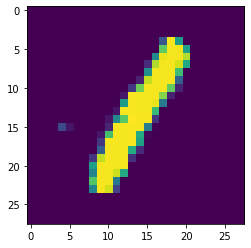

In [21]:
outputs_from_layer = []
img_from_prev_layer = images[4]
plt.imshow(img_from_prev_layer.squeeze())
img_from_prev_layer = img_from_prev_layer.unsqueeze(0)
for layer in conv_layers:
    img_from_prev_layer = layer(img_from_prev_layer)
    outputs_from_layer.append(img_from_prev_layer)

1st Conv2d layer
Max, idx:  345.95822 4
Min, idx:  -216.48694 5


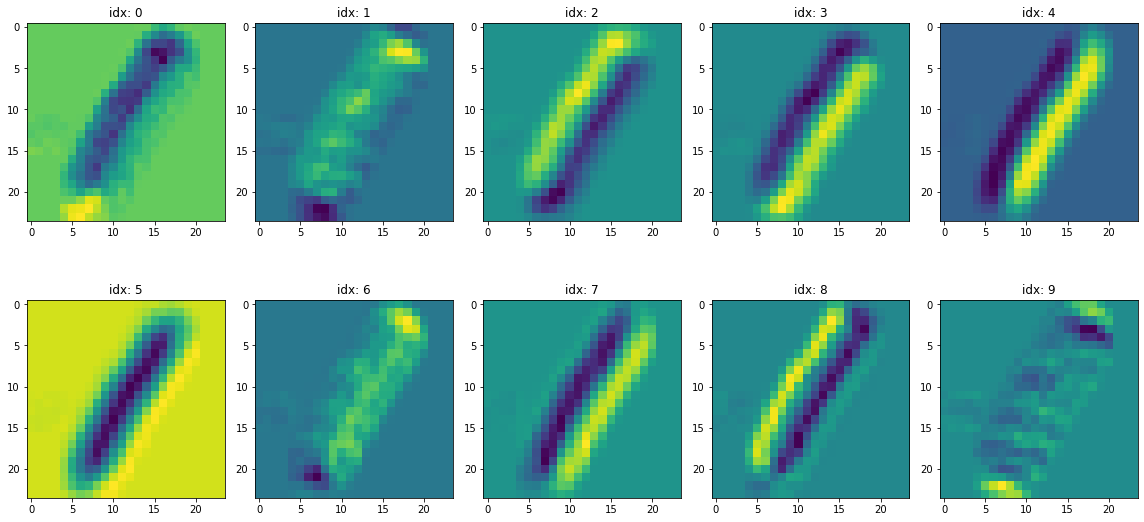

In [22]:
# Feature maps of the first Conv2d layer
# There are 10 filters

layer_number = 0
feature_maps = outputs_from_layer[layer_number].detach().numpy()

output_from_filters = feature_maps.sum(axis=3).sum(axis=2)
idx_max = output_from_filters.argmax()
max = output_from_filters.max()
idx_min = output_from_filters.argmin()
min = output_from_filters.min()

print('1st Conv2d layer')
print('Max, idx: ', max, idx_max)
print('Min, idx: ', min, idx_min)

figs, axes = plt.subplots(2, 5, figsize=[16,8])
for i in range(feature_maps.shape[1]):
    feature_map = feature_maps[0,i,:,:]
    axes[int(i/5), int(i%5)].set_title('idx: {0}'.format(i))
    axes[int(i/5), int(i%5)].imshow(feature_map)

plt.tight_layout()
figs.show()

2nd Conv2d layer
Max, idx:  35.243805 17
Min, idx:  -20.620113 4


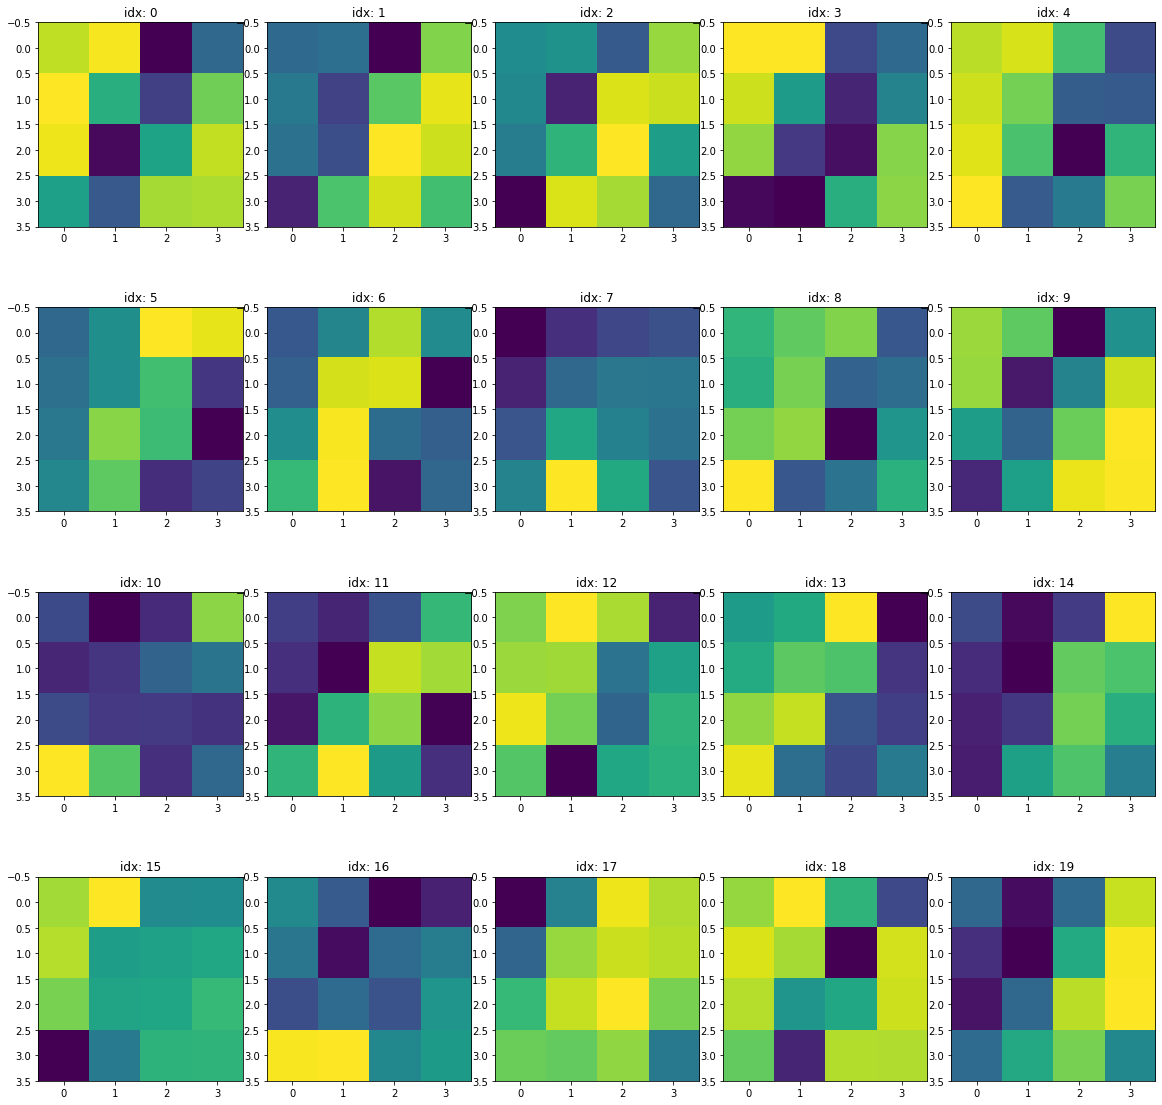

In [23]:
# Feature maps of the last maxpooling layer
# There are 10 filters

layer_number = 3
feature_maps = outputs_from_layer[layer_number].detach().numpy()

output_from_filters = feature_maps.sum(axis=3).sum(axis=2)
idx_max = output_from_filters.argmax()
max = output_from_filters.max()
idx_min = output_from_filters.argmin()
min = output_from_filters.min()

print('2nd Conv2d layer')
print('Max, idx: ', max, idx_max)
print('Min, idx: ', min, idx_min)

figs, axes = plt.subplots(4, 5, figsize=[16,16])
for i in range(feature_maps.shape[1]):
    feature_map = feature_maps[0,i,:,:]
    axes[int(i/5), int(i%5)].set_title('idx: {0}'.format(i))
    axes[int(i/5), int(i%5)].imshow(feature_map)

plt.tight_layout()
figs.show()